<a href="https://colab.research.google.com/github/Sadanan643021272-0/BSC_DPDM23/blob/main/Copy_of_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Preparation

In [2]:
import pandas as pd
import numpy as np

## Metadata

Number of Instances: 690

Number of Attributes: 15 + class attribute

Attribute Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z, dd, ff, o.
    A8:	continuous.
    A9:	t, f.
    A10:	t, f.
    A11:	continuous.
    A12:	t, f.
    A13:	g, p, s.
    A14:	continuous.
    A15:	continuous.
    A16: +,-         (class attribute)

Missing Attribute Values:
    37 cases (5%) have one or more missing values.  The missing
    values from particular attributes are:

    A1:  12
    A2:  12
    A4:   6
    A5:   6
    A6:   9
    A7:   9
    A14: 13

Class Distribution
  
    +: 307 (44.5%)
    -: 383 (55.5%)


In [4]:
col_name = ['a1','a2','a3','a4','a5','a6','a7','a8',
            'a9','a10','a11','a12','a13','a14','a15','a16']

In [5]:
credit = pd.read_csv('/content/drive/MyDrive/BSC_DPDM23/crx.data', header = None, names=col_name) # (1) Set header = None because there is no column names in the data file

print(credit.shape)
credit.head()

(690, 16)


,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [6]:
credit = credit[['a3','a8','a9','a10','a11','a12','a13','a15','a16']]

In [7]:
credit.isnull().any()

a3     False
a8     False
a9     False
a10    False
a11    False
a12    False
a13    False
a15    False
a16    False
dtype: bool

Preprocessing

In [11]:
credit = credit.replace({'t':1,'f':0,'g':1, 'p':2, 's':3,'+':1,'-':0})#เปลี่ยนค่าเป็้นตัวเลขและเครื่องหมาย เช่น cแทนค่าt=1

In [15]:
credit =credit[{'a9','a10','a11','a12','a13','a15','a16'}]

<ipython-input-15-b13328fcddd8>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  credit =credit[{'a9','a10','a11','a12','a13','a15','a16'}]


In [9]:
credit.head()

,a3,a8,a9,a10,a11,a12,a13,a15,a16
0,0.000,1.25,1,1,1,0,1,0,1
1,4.460,3.04,1,1,6,0,1,560,1
2,0.500,1.50,1,0,0,0,1,824,1
3,1.540,3.75,1,1,5,1,1,3,1
4,5.625,1.71,1,0,0,0,3,0,1


## Try simple ML

In [13]:
import numpy as np

In [14]:
np.random.seed(seed=1)

In [16]:
a = np.random.randint(2, size=len(credit))

In [17]:
a

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,

In [18]:
train = credit[a == 1]
train.shape

(324, 7)

In [22]:
train

,a12,a10,a13,a11,a9,a15,a16
0,0,1,1,1,1,0,1
1,0,1,1,6,1,560,1
4,0,0,3,0,1,0,1
5,1,0,1,0,1,0,1
6,1,0,1,0,1,31285,1
...,...,...,...,...,...,...,...
676,1,1,1,12,0,3,0
677,0,1,1,1,0,1,0
678,0,0,1,0,0,50,0
680,0,0,1,0,0,364,0


In [19]:
test = credit[a == 0]
test.shape

(366, 7)

## Start Decision Tree

### 1.import

In [20]:
from sklearn.tree import DecisionTreeClassifier

### 2.define

In [21]:
Dtree1 = DecisionTreeClassifier(random_state=0)

### train

In [23]:
X_train = train.iloc[:,:-1]

In [24]:
y_train = train.iloc[:,-1] #yคือdataสุดท้าย

In [25]:
Dtree1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [26]:
from sklearn import tree

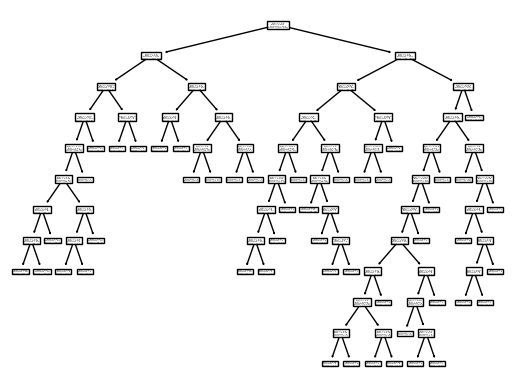

In [27]:
tree.plot_tree(Dtree1);

### 4.test

In [28]:
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

In [29]:
y_predict = Dtree1.predict(X_test)

In [30]:
 from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test, y_predict)#ความแม่นยำ

0.825136612021858

In [34]:
y_predict

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Set parameter

###1) Import

In [35]:
from sklearn.tree import DecisionTreeClassifier

### 2)Define

In [37]:
Dtree2 = DecisionTreeClassifier(random_state=0,max_depth=3)#การเปลี่ยนขนาดต้นไม้

### 3)Train

In [38]:
Dtree2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

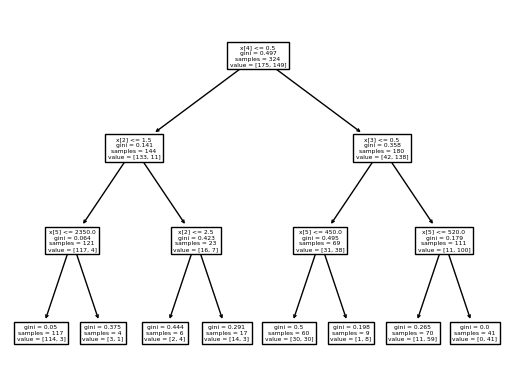

In [39]:
tree.plot_tree(Dtree2);

### 4)Test

In [ ]:
y_predict2 = Dtree2.predict(X_test)

In [ ]:
accuracy_score(y_test, y_predict2)

0.8579234972677595

# ~~HW3
ให้สร้างต้นไม้ของตัวเองโดยปรับเปลี่ยน2 Parameterให้และอธิบายParameter **ในsklearn
แถวmin_impurity_decrease